AB Testing Case Study

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


ImportError: cannot import name 'fishers_exact' from 'scipy.stats' (c:\Users\Dan\anaconda3\envs\DATAsci\lib\site-packages\scipy\stats\__init__.py)

In [6]:
df = pd.read_csv(r"C:\Users\Dan\miniconda3\Workspaces\Learning\Data\ab_test_click_data.csv")
df.head()

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00


In [7]:
df.describe()

,user_id,click
count,20000.000000,20000.000000
mean,10000.500000,0.405250
std,5773.647028,0.490953
min,1.000000,0.000000
25%,5000.750000,0.000000
50%,10000.500000,0.000000
75%,15000.250000,1.000000
max,20000.000000,1.000000


In [ ]:
# Check for missing values
df.isna().sum()

user_id          0
click            0
group            0
timestamp    10000
dtype: int64

In [ ]:
df.groupby('group').sum('click')

,user_id,click
group,,
con,150005000,1989
exp,50005000,6116


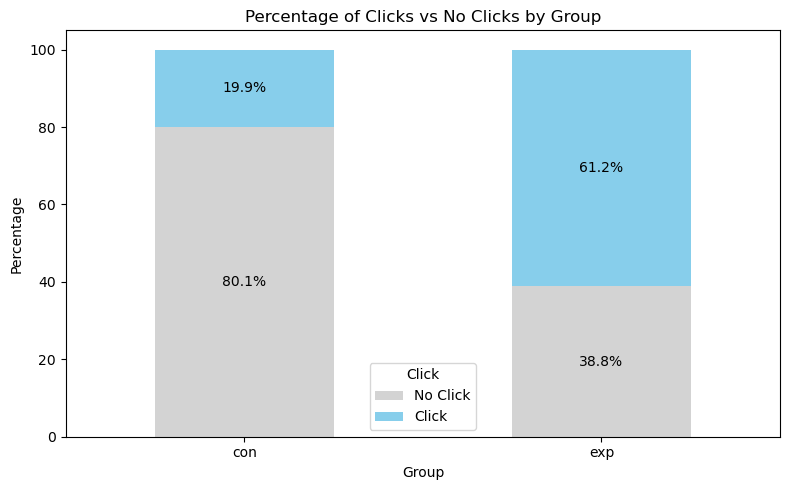

In [24]:
# Step 1: Count clicks and no-clicks per group
click_counts = df.groupby(['group', 'click']).size().unstack(fill_value=0)

# Step 2: Normalize to get percentages per group
click_percent = click_counts.div(click_counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart (percentages)
ax = click_percent.plot(kind='bar', stacked=True, color=['lightgray', 'skyblue'], figsize=(8, 5))

# Step 4: Annotate with percent values inside bars
for i, group in enumerate(click_percent.index):
    bottom = 0
    for click_value in [0, 1]:
        value = click_percent.loc[group, click_value]
        if value > 0:
            ax.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10, color='black')
            bottom += value

# Final plot adjustments
plt.title("Percentage of Clicks vs No Clicks by Group")
plt.ylabel("Percentage")
plt.xlabel("Group")
plt.legend(title="Click", labels=["No Click", "Click"])
plt.xticks(rotation=0)
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

Contingency Table:
click     0     1
group            
con    8011  1989
exp    3884  6116

Chi-squared: 3531.596
p-value: 0.0000
Degrees of freedom: 1
Expected Frequencies:
[[5947.5 4052.5]
 [5947.5 4052.5]]


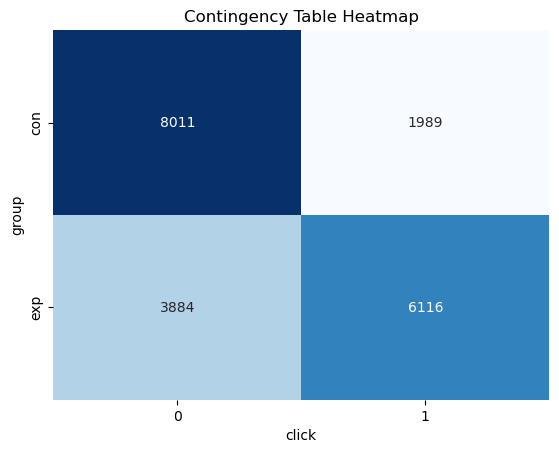

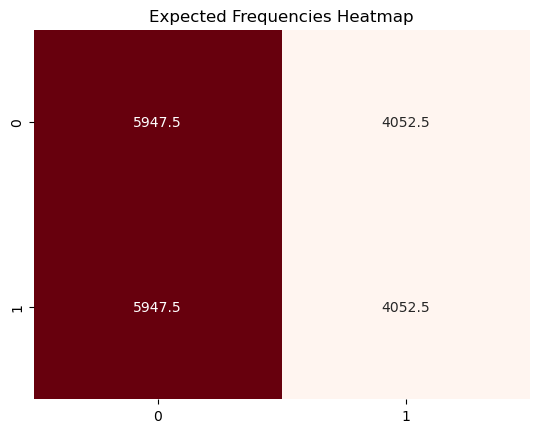

In [29]:




# Step 1: Create a 2x2 contingency table
contingency_table = pd.crosstab(df['group'], df['click'])

# Step 2: Run chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Report results
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-squared: {chi2:.3f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected Frequencies:")
print(expected)

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Contingency Table Heatmap")
plt.show()

sns.heatmap(expected, annot=True, fmt='.1f', cmap='Reds', cbar=False)
plt.title("Expected Frequencies Heatmap")
plt.show()

In [38]:
fishers_exact = stats.fisher_exact(contingency_table)
print(f"Fisher's Exact Test: {fishers_exact[0]:.3f}, p-value: {fishers_exact[1]:.4f}")

Fisher's Exact Test: 6.342, p-value: 0.0000


Shuffled Contingency Table:
click     0     1
group            
con    5900  4100
exp    5995  4005

Chi-squared: 1.833
p-value: 0.1758
❌ Not statistically significant — supports the null hypothesis (independence).


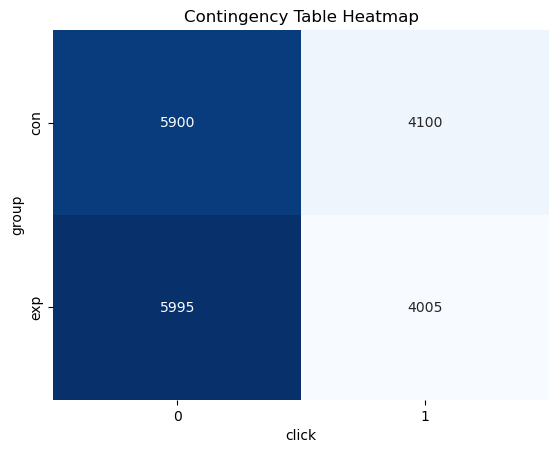

In [ ]:
# Step 1: Shuffle the group labels
df_shuffled = df.copy()
df_shuffled['group'] = np.random.permutation(df['group'].values)

# Step 2: Create new contingency table
contingency_shuffled = pd.crosstab(df_shuffled['group'], df_shuffled['click'])

# Step 3: Perform chi-squared test on shuffled data
chi2, p, dof, expected = chi2_contingency(contingency_shuffled)

# Step 4: Display
print("Shuffled Contingency Table:")
print(contingency_shuffled)
print(f"\nChi-squared: {chi2:.3f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("✅ Statistically significant — a rare shuffle outcome to reject the null.")
else:
    print("❌ Not statistically significant — supports the null hypothesis (independence).")

sns.heatmap(contingency_shuffled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Contingency Table Heatmap")
plt.show()

In [41]:
fishers_exact = stats.fisher_exact(df_shuffled.groupby(['group', 'click']).size().unstack(fill_value=0))
print(f"Fisher's Exact Test: {fishers_exact[0]:.3f}, p-value: {fishers_exact[1]:.4f}")

Fisher's Exact Test: 0.992, p-value: 0.7954
